In [187]:
import jsonpickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open("100_results.json", "r") as file:
    contents = file.read()
    unfrozen = jsonpickle.decode(contents)

df = pd.DataFrame(unfrozen)
cols = list(df.columns)


## Group items
Group items by depth (= how many steps were required to finish the puzzle), show the distribution of depths as chart

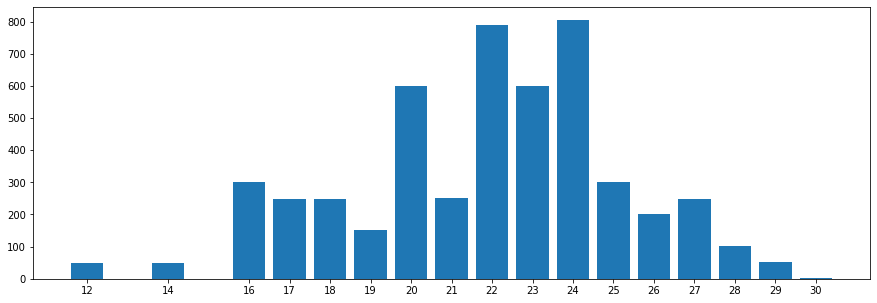

In [254]:
group = df.groupby(['depth'])
x_pos = [i for i, _ in enumerate(group)]
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(list(group.groups.keys()))
ax.bar(list(group.groups.keys()), list(group.size()))
plt.show()

## Focus on a single constellation

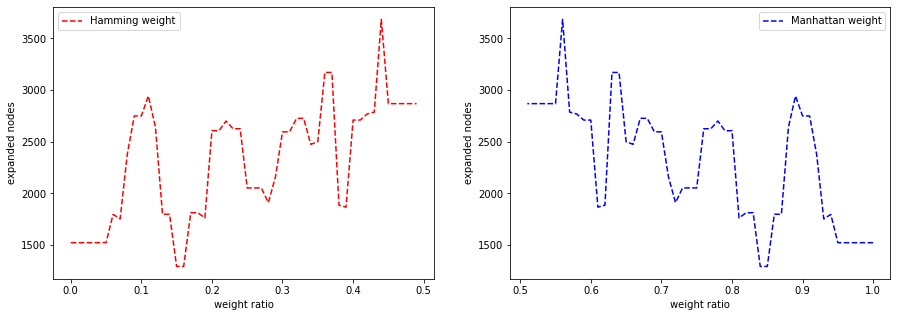

In [227]:
x1 = np.array(df[0:50]['weights'].tolist())[:,0]
y1 = df[0:50]['expanded_nodes']
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[1].plot(x1,y1, "b--", label="Manhattan weight")
ax[1].set_xlabel("weight ratio")
ax[1].set_ylabel("expanded nodes")
ax[1].legend()

x2 = np.array(df[0:50]['weights'].tolist())[:,1]
y2 = df[0:50]['expanded_nodes']
ax[0].plot(x2,y2, "r--", label="Hamming weight")
ax[0].set_xlabel("weight ratio")
ax[0].set_ylabel("expanded nodes")
ax[0].legend()

plt.show()


## Print constellation for all (average)

Shows the average expanded nodes based on the weight


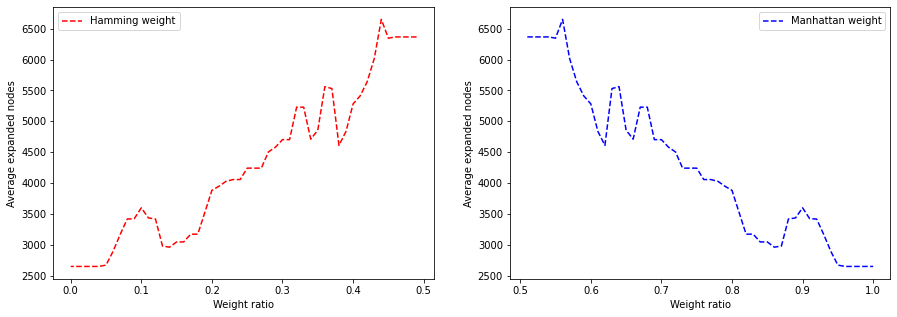

In [228]:
x1 = (np.array(df['weights'].tolist())[:,0])
y1 = (df['expanded_nodes'])

df['weight1'] = np.array(df['weights'].tolist())[:,0]
df['weight2'] = np.array(df['weights'].tolist())[:,1]
df.drop(['weights'], axis=1)

weight_group = df.groupby(['weight1', 'weight2'])

weight1_averages = []
weight2_averages = []
nodes_averages = []

for item in weight_group:
    weight1_averages.append(item[1]['weight1'].mean())
    weight2_averages.append(item[1]['weight2'].mean())
    nodes_averages.append(item[1]['expanded_nodes'].mean())

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[1].plot(weight1_averages, nodes_averages, "b--", label="Manhattan weight") 
ax[1].set_xlabel("Weight ratio")
ax[1].set_ylabel("Average expanded nodes")
ax[1].legend()

ax[0].plot(weight2_averages, nodes_averages, "r--",label = "Hamming weight") 
ax[0].set_xlabel("Weight ratio")
ax[0].set_ylabel("Average expanded nodes")
ax[0].legend()

plt.show()


In [194]:
df = pd.DataFrame(unfrozen)

## Min Nodes

In [71]:
min_value = group[['expanded_nodes']].min()
min_value

,expanded_nodes
depth,
12,87
14,156
16,82
17,282
18,258
19,341
20,194
21,279
22,619


## Max Nodes

In [69]:
min_value = group[['expanded_nodes']].max()
min_value

,expanded_nodes
depth,
12,156
14,274
16,568
17,1119
18,1608
19,1671
20,3684
21,4268
22,6292


## Mean Nodes

In [20]:
mean_value = group[['expanded_nodes']].mean()
print(mean_value)

       expanded_nodes
depth                
12         102.860000
14         208.180000
16         265.550000
17         589.080645
18         608.369478
19         951.315789
20        1359.534110
21        1963.688000
22        2500.058302
23        3683.756667
24        4904.048447
25        7573.666667
26        8395.901478
27       14266.532258
28       21587.693069
29       31689.942308
30       26450.000000


## Optimal Weights

In [78]:
fastest = df.loc[group['expanded_nodes'].idxmin()]
fastest

,array,weights,expanded_nodes,time_elapsed,depth
2936,"(3, 1, 0, 7, 4, 2, 8, 6, 5)","[0.6399999999999997, 0.36]",87,0.012997,12
4230,"(2, 1, 5, 4, 3, 8, 6, 7, 0)","[0.6999999999999997, 0.3]",156,0.019999,14
4150,"(1, 6, 0, 7, 8, 4, 3, 5, 2)","[1.0, 0.0]",82,0.009999,16
4715,"(6, 4, 5, 3, 1, 0, 7, 2, 8)","[0.8499999999999999, 0.15]",282,0.048999,17
2017,"(6, 2, 5, 7, 8, 1, 4, 3, 0)","[0.8299999999999998, 0.17]",258,0.045998,18
4917,"(8, 7, 4, 0, 1, 2, 3, 5, 6)","[0.8299999999999998, 0.17]",341,0.046000,19
3100,"(0, 8, 3, 4, 6, 5, 1, 2, 7)","[1.0, 0.0]",194,0.032001,20
350,"(7, 0, 8, 5, 4, 1, 3, 2, 6)","[1.0, 0.0]",279,0.048999,21
722,"(5, 4, 3, 7, 0, 6, 8, 1, 2)","[0.7799999999999998, 0.22]",619,0.105999,22
567,"(4, 0, 6, 7, 8, 3, 5, 2, 1)","[0.8299999999999998, 0.17]",268,0.046999,23


## Shows the optimal weight
Based on the average of the least nodes expanded over all depths

In [22]:
np.mean(fastest['weights'].tolist(), axis=0)

array([0.88588235, 0.11411765])